<a href="https://colab.research.google.com/github/Sim-mi-gyeong/DataAnalysis/blob/main/TermProject10_variavility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 각각의 csv파일을 불러와 df20__ 값에 저장
df2017=pd.read_csv('/content/drive/MyDrive/dataset/2017.csv')
df2018=pd.read_csv('/content/drive/MyDrive/dataset/2018.csv')
df2019=pd.read_csv('/content/drive/MyDrive/dataset/2019.csv')
df2020=pd.read_csv('/content/drive/MyDrive/dataset/2020.csv')
df2021=pd.read_csv('/content/drive/MyDrive/dataset/2021.csv')

In [5]:
# 각 csv 파일에 대한 DataFrame에서 결측값 확인
df2017.isnull().sum()

Country                         0
Regional indicator              0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [6]:
df2018.isnull().sum()

Country                         0
Regional indicator              0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [7]:
# 2018년 데이터 중 결측값을 해당 column의 평균값으로 대체
df2018['Perceptions of corruption']=df2018['Perceptions of corruption'].fillna(df2018['Perceptions of corruption'].mean())

In [8]:
df2018.isnull().sum()

Country                         0
Regional indicator              0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
df2019.isnull().sum()

Country                         0
Regional indicator              0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [10]:
df2020.isnull().sum()

Country                         0
Regional indicator              0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [11]:
df2021.isnull().sum()

Country                         0
Regional indicator              0
Score                           0
GDP per capita                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [12]:
# 각 연도별 DataFrame에 해당 연도에 따른 Year Column 추가
df2017['Year']=2017
df2018['Year']=2018
df2019['Year']=2019
df2020['Year']=2020
df2021['Year']=2021

# 5개년 DataFrame 병합
df=df2017.append([df2018, df2019, df2020, df2021])
df

,Country,Regional indicator,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Afghanistan,South Asia,3.794,0.401477,0.180747,0.106180,0.311871,0.061158,2017
1,Albania,Central and Eastern Europe,4.644,0.996193,0.731160,0.381499,0.201313,0.039864,2017
2,Algeria,Middle East and North Africa,5.872,1.091864,0.617585,0.233336,0.069437,0.146096,2017
3,Argentina,Latin America and Caribbean,6.599,1.185295,0.695137,0.494519,0.109457,0.059740,2017
4,Armenia,Commonwealth of Independent States,4.376,0.900597,0.637524,0.198303,0.083488,0.026674,2017
...,...,...,...,...,...,...,...,...,...
138,Venezuela,Latin America and Caribbean,4.892,0.852000,0.574000,0.615000,-0.169000,0.827000,2021
139,Vietnam,Southeast Asia,5.411,0.817000,0.616000,0.940000,-0.098000,0.796000,2021
140,Yemen,Middle East and North Africa,3.658,0.329000,0.272000,0.602000,-0.147000,0.800000,2021
141,Zambia,Sub-Saharan Africa,4.073,0.528000,0.231000,0.782000,0.061000,0.823000,2021


In [13]:
# 각 국가들의 연도별 Happiness Score를 df20__에 저장

df2017_score=df[df['Year']==2017]['Score']
df2018_score=df[df['Year']==2018]['Score']
df2019_score=df[df['Year']==2019]['Score']
df2020_score=df[df['Year']==2020]['Score']
df2021_score=df[df['Year']==2021]['Score']

In [14]:
# df20__에 저장한 각 국가들의 연도별 Happiness Score를 DataFrame으로 변환
df2017_score=pd.DataFrame(df2017_score)
df2017_score.rename(columns={'Score':2017},inplace = True)

df2018_score=pd.DataFrame(df2018_score)
df2018_score.rename(columns={'Score':2018},inplace = True)

df2019_score=pd.DataFrame(df2019_score)
df2019_score.rename(columns={'Score':2019},inplace = True)

df2020_score=pd.DataFrame(df2020_score)
df2020_score.rename(columns={'Score':2020},inplace = True)

df2021_score=pd.DataFrame(df2021_score)
df2021_score.rename(columns={'Score':2021},inplace = True)

In [15]:
# 연도별 Happiness Score의 DataFrame을 df_score로 병합
df_score=pd.concat([df2017_score, df2018_score, df2019_score, df2020_score, df2021_score], axis=1)
df_score

,2017,2018,2019,2020,2021
0,3.794,3.632,3.203,2.5669,2.523
1,4.644,4.586,4.719,4.8827,5.117
2,5.872,5.295,5.211,5.0051,4.887
3,6.599,6.388,6.086,5.9747,5.929
4,4.376,4.321,4.559,4.6768,5.283
...,...,...,...,...,...
138,5.250,4.806,4.707,5.0532,4.892
139,5.074,5.103,5.175,5.3535,5.411
140,3.593,3.355,3.380,3.5274,3.658
141,4.514,4.377,4.107,3.7594,4.073


In [16]:
# df_score에 Country coulmn 추가

df_score['Country']=df2017['Country']
df_score

,2017,2018,2019,2020,2021,Country
0,3.794,3.632,3.203,2.5669,2.523,Afghanistan
1,4.644,4.586,4.719,4.8827,5.117,Albania
2,5.872,5.295,5.211,5.0051,4.887,Algeria
3,6.599,6.388,6.086,5.9747,5.929,Argentina
4,4.376,4.321,4.559,4.6768,5.283,Armenia
...,...,...,...,...,...,...
138,5.250,4.806,4.707,5.0532,4.892,Venezuela
139,5.074,5.103,5.175,5.3535,5.411,Vietnam
140,3.593,3.355,3.380,3.5274,3.658,Yemen
141,4.514,4.377,4.107,3.7594,4.073,Zambia


In [17]:
# std=각 국가들의 연도별 Happiness Score의 표준편차 -> 변동성의 척도
# df_score에 std column 추가

df_score['std']=df_score.iloc[:,:-1].std(axis=1)
df_score

,2017,2018,2019,2020,2021,Country,std
0,3.794,3.632,3.203,2.5669,2.523,Afghanistan,0.587965
1,4.644,4.586,4.719,4.8827,5.117,Albania,0.214182
2,5.872,5.295,5.211,5.0051,4.887,Algeria,0.381476
3,6.599,6.388,6.086,5.9747,5.929,Argentina,0.287938
4,4.376,4.321,4.559,4.6768,5.283,Armenia,0.384958
...,...,...,...,...,...,...,...
138,5.250,4.806,4.707,5.0532,4.892,Venezuela,0.214155
139,5.074,5.103,5.175,5.3535,5.411,Vietnam,0.151062
140,3.593,3.355,3.380,3.5274,3.658,Yemen,0.132054
141,4.514,4.377,4.107,3.7594,4.073,Zambia,0.292865


In [18]:
# 각 연도별 Score의 표준편차가 클수록 연도에 따른 Score의 변동성이 크다고 정의
# 각 연도별 Score의 표준편차에 대한 내림차순(변동성이 큰 순서로) DataFrame 정렬

df_score=df_score.sort_values(by='std', ascending=False)
df_score

,2017,2018,2019,2020,2021,Country,std
12,3.657,4.141,4.883,5.2160,5.045,Benin,0.662727
47,3.507,3.964,4.534,4.9493,4.984,Guinea,0.641780
0,3.794,3.632,3.203,2.5669,2.523,Afghanistan,0.587965
72,3.533,3.495,3.975,4.5579,4.625,Liberia,0.540533
19,2.905,2.905,3.775,3.7753,3.775,Burundi,0.476573
...,...,...,...,...,...,...,...
7,5.234,5.201,5.208,5.1648,5.171,Azerbaijan,0.028334
62,5.920,5.915,5.886,5.8708,5.940,Japan,0.027710
52,7.504,7.495,7.494,7.5045,7.554,Iceland,0.024914
118,5.838,5.875,5.895,5.8724,5.845,South Korea,0.023365


In [19]:
# 연도별 Score의 변동성이 가장 큰 상위 10개 국가
df_score.head(10)

,2017,2018,2019,2020,2021,Country,std
12,3.657,4.141,4.883,5.2160,5.045,Benin,0.662727
47,3.507,3.964,4.534,4.9493,4.984,Guinea,0.641780
0,3.794,3.632,3.203,2.5669,2.523,Afghanistan,0.587965
72,3.533,3.495,3.975,4.5579,4.625,Liberia,0.540533
19,2.905,2.905,3.775,3.7753,3.775,Burundi,0.476573
66,5.279,5.662,6.100,6.3252,6.372,Kosovo,0.467578
78,6.084,6.322,5.339,5.3843,5.384,Malaysia,0.464798
60,4.180,4.671,4.944,5.2333,5.306,Ivory Coast,0.459133
95,4.028,4.166,4.628,4.9096,5.074,Niger,0.455328
27,4.291,4.559,4.812,5.1944,5.342,Congo (Brazzaville),0.435531


In [20]:
# 연도별 Score의 변동성이 작은 하위 10개 국가
df_score.tail(10)

,2017,2018,2019,2020,2021,Country,std
11,6.891,6.927,6.923,6.8635,6.834,Belgium,0.039594
67,6.105,6.083,6.021,6.1021,6.106,Kuwait,0.036128
50,5.472,5.430,5.430,5.5104,5.477,"Hong Kong S.A.R., China",0.034271
121,7.284,7.314,7.343,7.3535,7.363,Sweden,0.032292
46,6.454,6.382,6.436,6.3989,6.435,Guatemala,0.029662
7,5.234,5.201,5.208,5.1648,5.171,Azerbaijan,0.028334
62,5.920,5.915,5.886,5.8708,5.940,Japan,0.027710
52,7.504,7.495,7.494,7.5045,7.554,Iceland,0.024914
118,5.838,5.875,5.895,5.8724,5.845,South Korea,0.023365
93,7.314,7.324,7.307,7.2996,7.277,New Zealand,0.017726


Text(0.5, 1.0, 'Top variavility of Happiness Score Country')

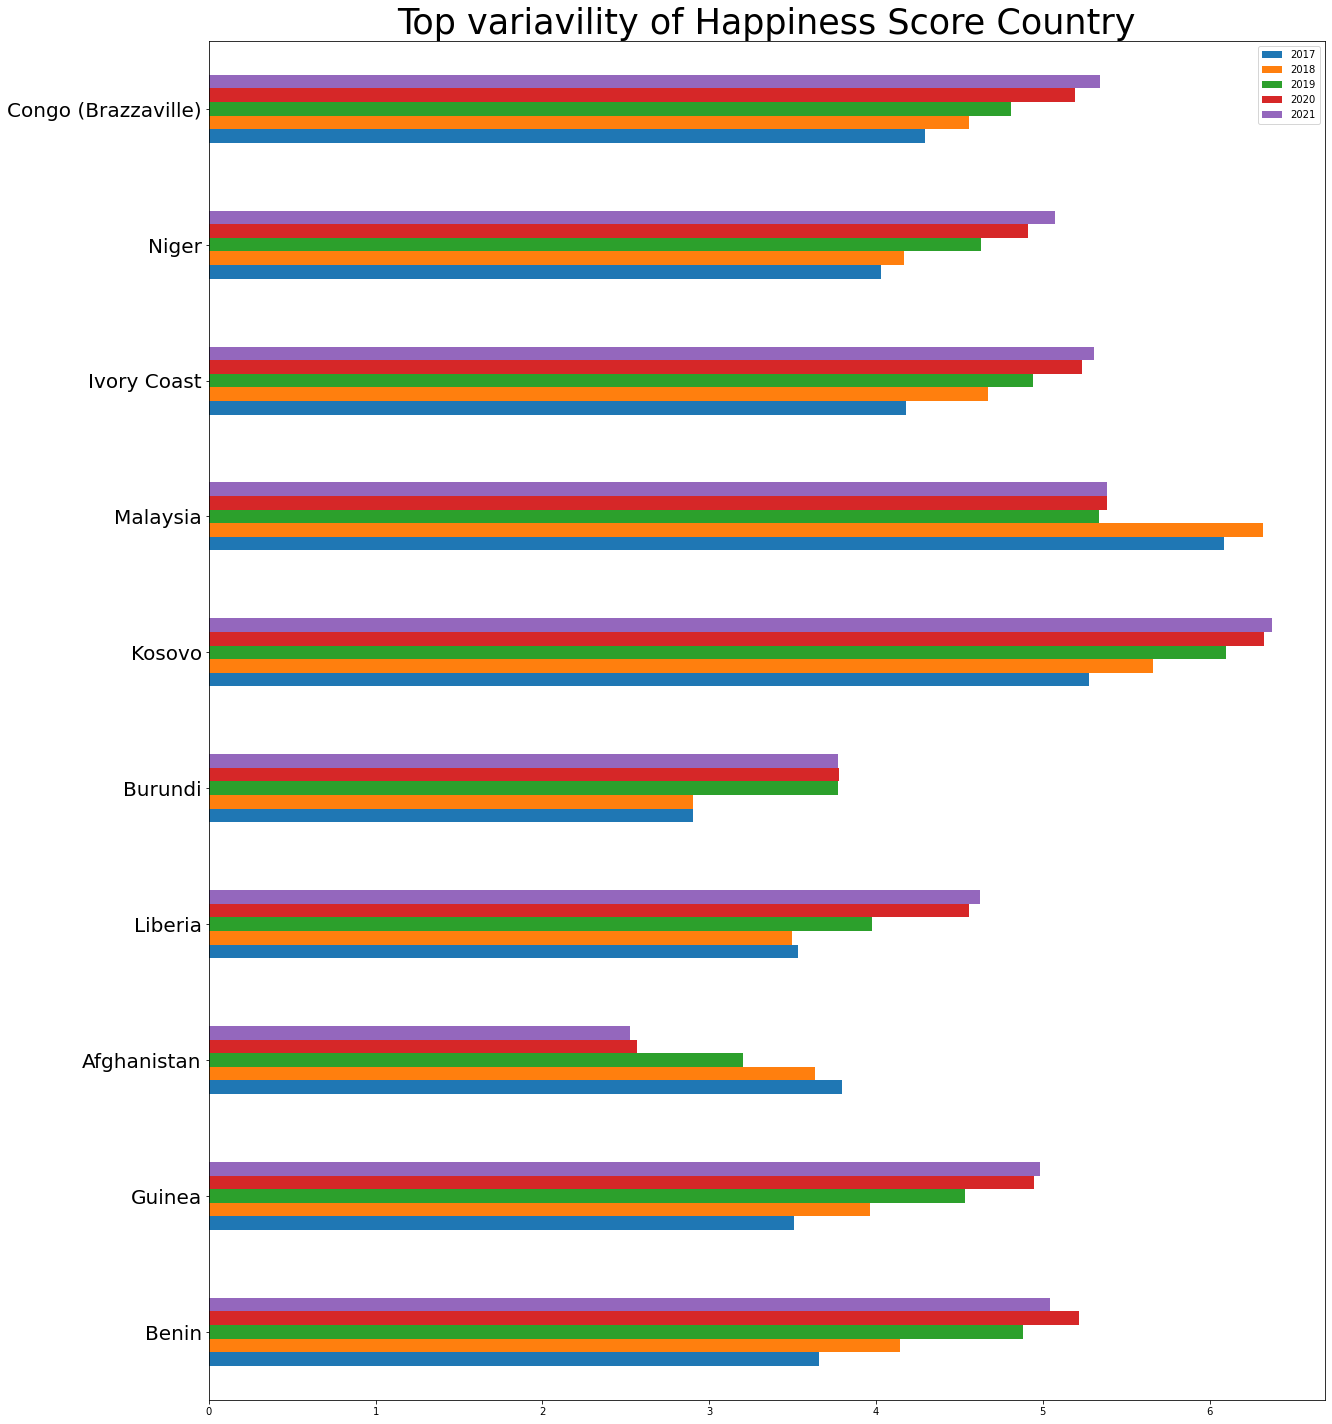

In [30]:
# 연도별 Score의 변동성이 가장 큰 상위 10개 국가의 이름을 list로 변환
top_labels=df_score['Country'].head(10).tolist()

# 연도별 Score의 변동성이 가장 큰 상위 10개 국가의 각 연도별 Score를 가로 막대그래프로 그리기

top_variavility=df_score.iloc[:,:-1].head(10)
ax=top_variavility.plot.barh(rot=0)
ax.set_yticklabels(top_labels)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
fig = plt.gcf()
fig.set_size_inches(20,25)
plt.title("Top variavility of Happiness Score Country", fontsize=35)

Text(0.5, 1.0, 'Bottom variavility of Happiness Score Country')

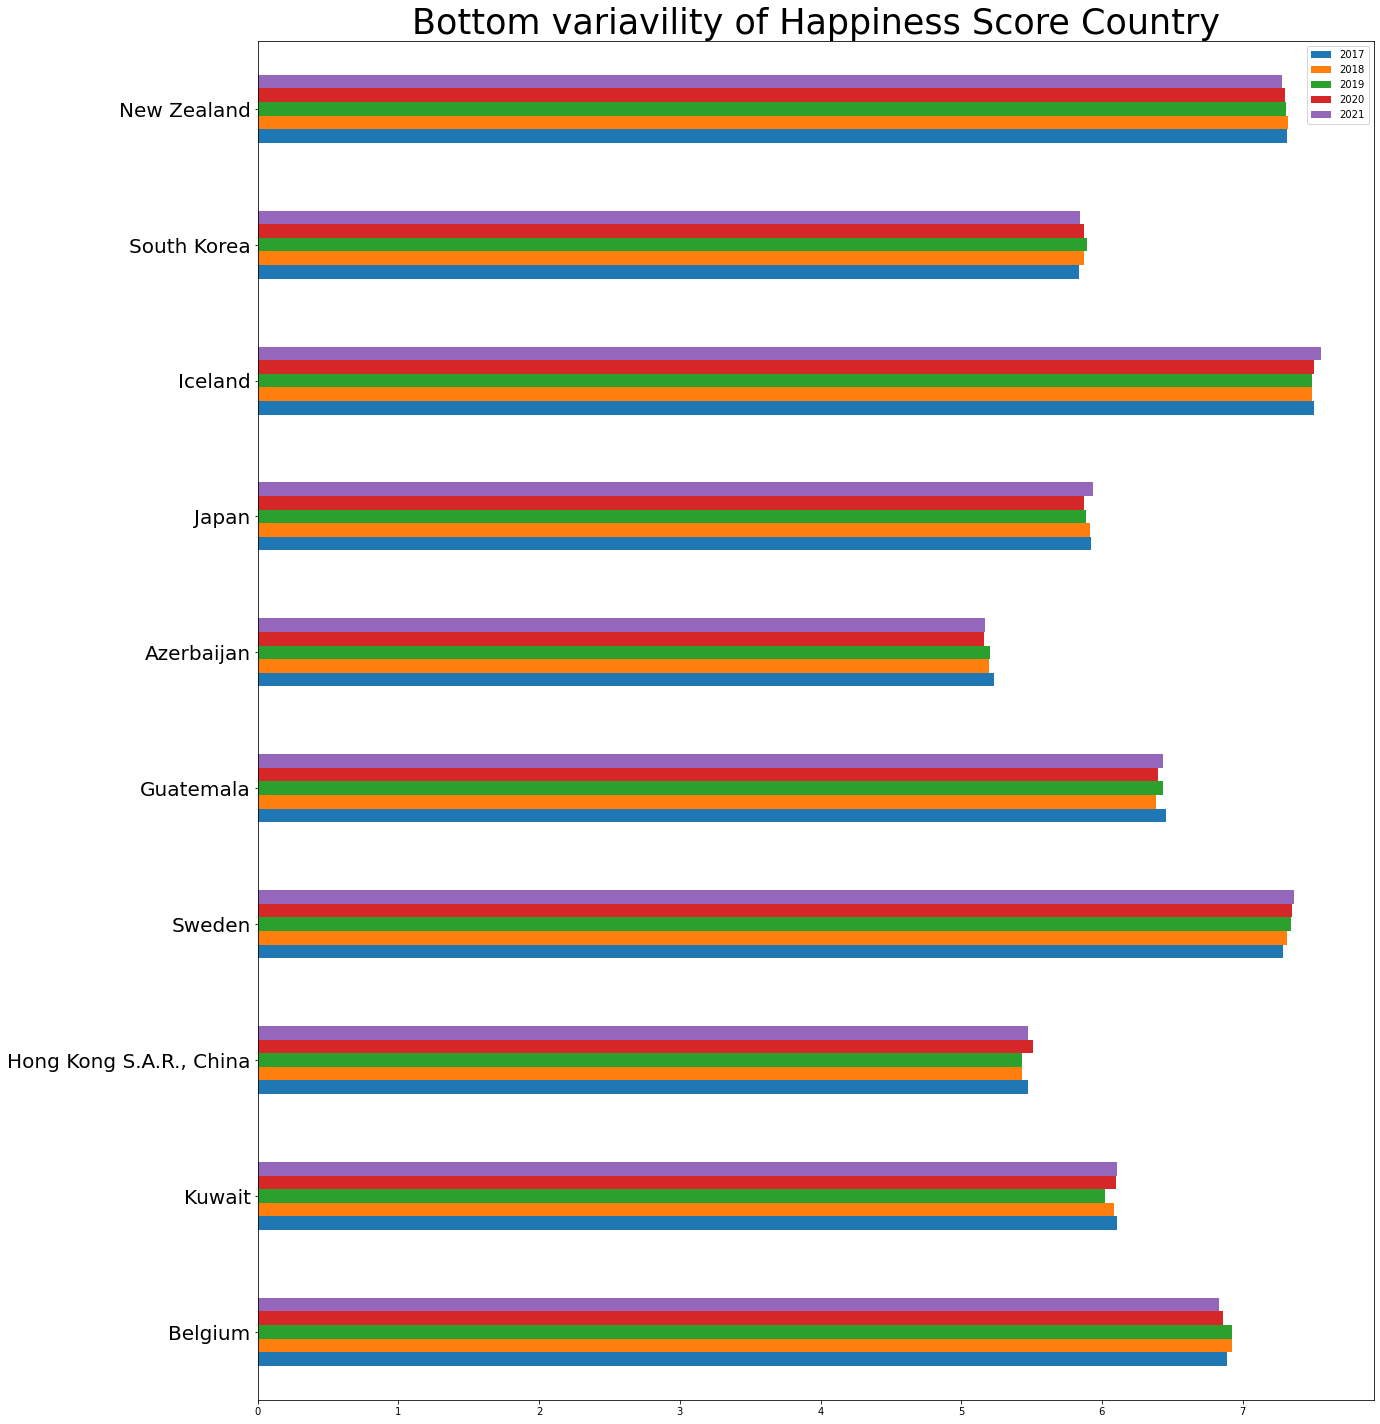

In [29]:
# 변동성이 작은 국가들 10개에 대한 plot도 제시해 폭의 크기 비교

# 연도별 Score의 변동성이 작은 하위 10개 국가의 이름을 list로 변환
bottom_labels=df_score['Country'].tail(10).tolist()
bottom_labels

bottom_variavility=df_score.iloc[:,:-1].tail(10)
ax=bottom_variavility.plot.barh(rot=0)
ax.set_yticklabels(bottom_labels)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
fig = plt.gcf()
fig.set_size_inches(20,25)
plt.title("Bottom variavility of Happiness Score Country", fontsize=35)

# 위의 상위 변동 국가들에 비해 연도별 막대그래프의 차이가 매우 작은 것을 확인 가능